In [306]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [308]:
img = cv2.imread('data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(img)
#plt.imshow(img, cmap='gray')

(Text(0.5, 0, 'Colour'), Text(0, 0.5, 'Count'))

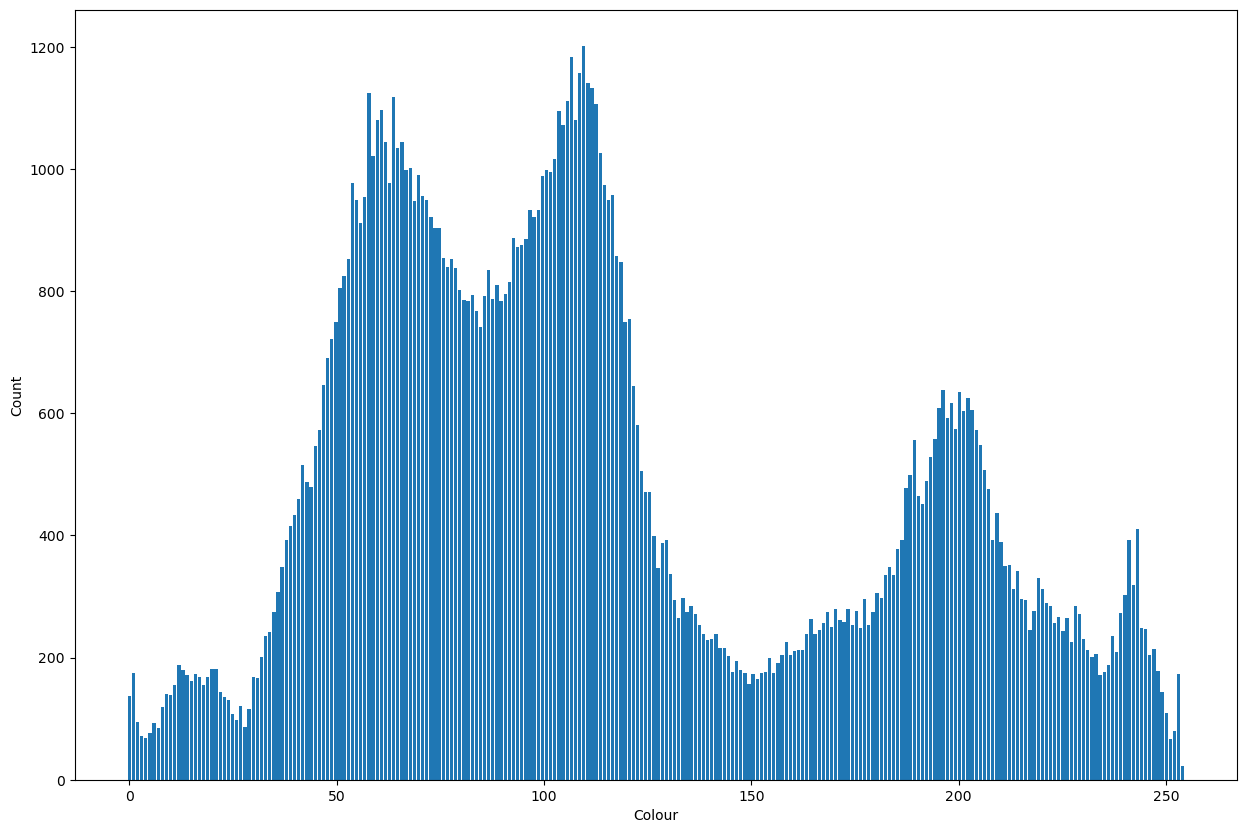

In [312]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
#lt.grid(True)

In [314]:
rows, cols = img.shape
num_pixels = cv2.sumElems(img)[0]
print(num_pixels)

14027186.0


In [316]:
best_wcv = 1e6 
img_array = np.array(img)
for th in range(0, 256):
    foreground = img_array[img_array >= th]
    background = img_array[img_array < th]
    if len(foreground) == 0 or len(background) == 0:
        continue
    fg = len(foreground)
    bg = len(background)
    omega_f = fg/num_pixels
    omega_b = bg/num_pixels
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    wcv = omega_f*sigma2_f + omega_b*sigma2_b
    if wcv < best_wcv:
       best_wcv = wcv
       opt_th = th
print('Optimal threshold', opt_th)        

Optimal threshold 140


(<Axes: >, <matplotlib.image.AxesImage at 0x7f2e77278f50>)

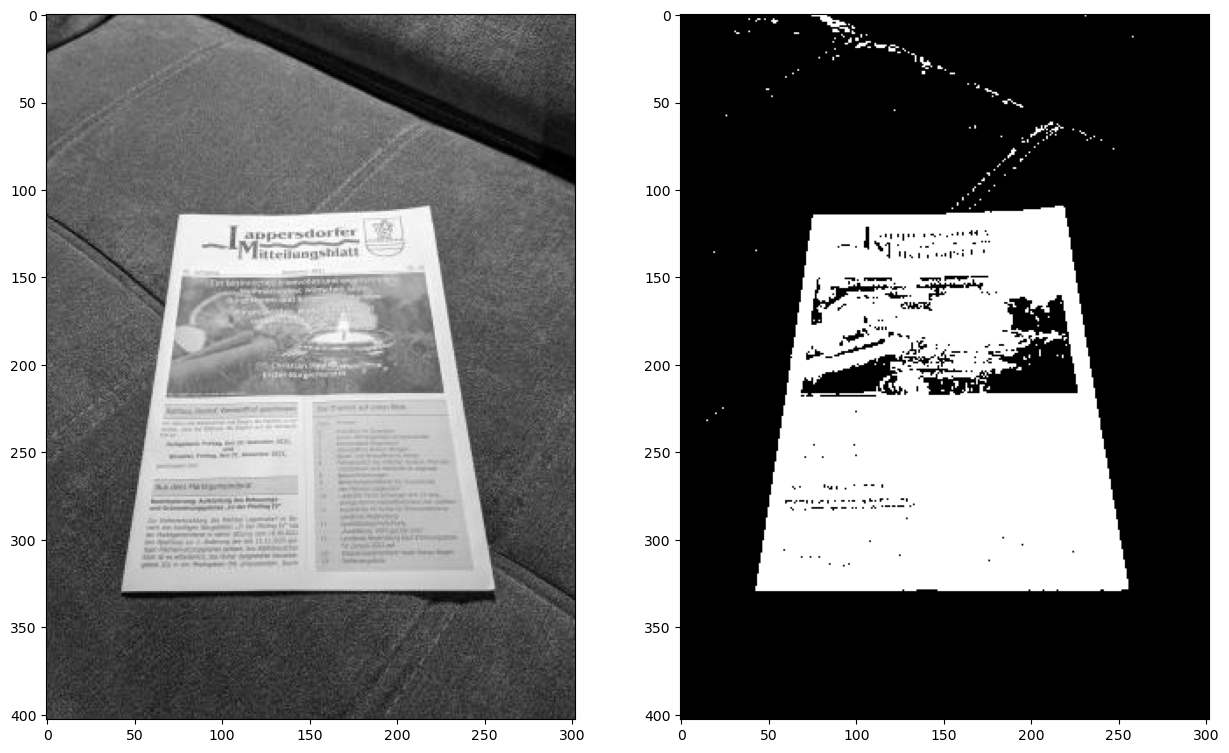

In [318]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

In [320]:
#Looking at the computed histogram, could it be considered bimodal?
# Да, здесь есть достаточно явное разделение цветов(тонов)
#Looking at the computed histogram, what binarization threshold would you chose? Why?
#Я бы выбрал примерно такой же. Там прослеживается явноое разделение
#Looking at the resulting (thresholded) image, is the text binarization (detection) good?
# Определение текста выглядит плохо. Наверное этот способ не подходит для таких задач.